In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Preprocessing or Data Cleaning

Data cleaning (also known as data preprocessing or data wrangling) is the process of identifying and correcting (or removing) errors, inconsistencies, and inaccuracies in the data. It’s a crucial step in the data science workflow because raw data is often messy, incomplete, or inconsistent. If the data is not cleaned properly, it can negatively affect the performance of any model or ana



In [3]:
#Reading Data
import pandas as pd
import numpy as np

#load dataset
df=pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/loan_eligibility_data_30k.csv')
df.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,Education,LoanApproved
0,CUST00001,47008.957498,11239.783091,548.0,0.405557,Bachelors,No
1,CUST00002,55437.667681,12240.739286,564.0,0.305308,Masters,No
2,CUST00003,10000.000000,14188.791620,561.0,0.162537,Bachelors,No
3,CUST00004,33049.989256,13514.263908,514.0,0.341843,Bachelors,No
4,CUST00005,72337.992374,10156.559065,633.0,0.213681,Other,Yes


### 1.1. Find the Missing Values and Fix (for Numerical Data)

Missing values occur when data points or entries are absent from a dataset. This can happen for various reasons:

- Data entry errors (e.g., missing data during form submission).

- System or transmission errors (e.g., issues while collecting or transmitting data).

- Deliberate omission (e.g., a customer leaves a field blank).

- Irrelevant data (e.g., certain features not applicable for a specific observation).

In a dataset, missing values can be represented as:

 - NaN (Not a Number) in numerical data.

 - Empty strings "" in text or categorical data.

 - A special placeholder like NULL, None, or ?.


 **Missing values can lead to biased models and inaccurate predictions** if not handled properly, as the model may either ignore valuable data or make incorrect assumptions. Additionally, they can skew statistical analyses, leading to misleading insights and conclusions.



In [37]:
#Checking for missing values
print(df.isnull().sum())   #print(df.isna().sum())
print(df.info())
print(df.describe())

CustomerID                0
Income                    0
LoanAmount                0
CreditScore               0
DebtToIncomeRatio         0
Education                 0
LoanApproved              0
Education_LabelEncoded    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Income                  30000 non-null  float64
 2   LoanAmount              30000 non-null  float64
 3   CreditScore             30000 non-null  float64
 4   DebtToIncomeRatio       30000 non-null  float64
 5   Education               30000 non-null  object 
 6   LoanApproved            30000 non-null  object 
 7   Education_LabelEncoded  30000 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB
None
             Income    LoanAmount   CreditScore  DebtToInc

#### Strategy1: Remove the rows / columns with missing values
It works when the no of missing value rows are minimal

In [38]:
#Remove rows with missing value
df.dropna(inplace=True)

In [39]:
#Checking for missing values
print(df.isnull().sum())   #print(df.isna().sum())
print(df.info())
print(df.describe())

CustomerID                0
Income                    0
LoanAmount                0
CreditScore               0
DebtToIncomeRatio         0
Education                 0
LoanApproved              0
Education_LabelEncoded    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Income                  30000 non-null  float64
 2   LoanAmount              30000 non-null  float64
 3   CreditScore             30000 non-null  float64
 4   DebtToIncomeRatio       30000 non-null  float64
 5   Education               30000 non-null  object 
 6   LoanApproved            30000 non-null  object 
 7   Education_LabelEncoded  30000 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 1.8+ MB
None
             Income    LoanAmount   CreditScore  DebtToInc

#### Strategy2: Imputing or Replacing
Replace the missing values with min/median or mode.
1. min() - It is applicable for numerical data, and the data is not skewed. It is affected by the outliers.

2. median() - It is applicable for numerical data and can be choosen on skewed data. It is not affected much by the outliers.

3. mode() - It is used when the data is categorical.

In [40]:
#Reload data
df=pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/loan_eligibility_data_30k.csv')

In [41]:
#Imputing missing values with median of the feature
df['Income'].fillna(df['Income'].median(), inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['CreditScore'].fillna(df['CreditScore'].median(), inplace=True)
df['DebtToIncomeRatio'].fillna(df['DebtToIncomeRatio'].median(), inplace=True)


/tmp/ipython-input-41-1242235114.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
/tmp/ipython-input-41-1242235114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [42]:
print(df.isnull().sum())

CustomerID             0
Income                 0
LoanAmount             0
CreditScore            0
DebtToIncomeRatio      0
Education            300
LoanApproved           0
dtype: int64


In [43]:
df.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,Education,LoanApproved
0,CUST00001,47008.957498,11239.783091,548.0,0.405557,Bachelors,No
1,CUST00002,55437.667681,12240.739286,564.0,0.305308,Masters,No
2,CUST00003,10000.000000,14188.791620,561.0,0.162537,Bachelors,No
3,CUST00004,33049.989256,13514.263908,514.0,0.341843,Bachelors,No
4,CUST00005,72337.992374,10156.559065,633.0,0.213681,Other,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         30000 non-null  object 
 1   Income             30000 non-null  float64
 2   LoanAmount         30000 non-null  float64
 3   CreditScore        30000 non-null  float64
 4   DebtToIncomeRatio  30000 non-null  float64
 5   Education          29700 non-null  object 
 6   LoanApproved       30000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


### 1.2. Fixing the Outliers (for Numerical Data)

Outliers are data points that significantly differ from other observations in the dataset. They are unusually high or low values that fall far outside the normal range of the data distribution.

For example, in a dataset of ages ranging from 20 to 60, a value like 120 would be an outlier.

**Outliers can skew statistical metrics** like mean and standard deviation, leading to misleading conclusions. They can also distort model performance, causing inaccurate predictions and making algorithms overly sensitive to extreme values.



#### Plotting Outliers
data points outside the wishkers of the box plot.

<Axes: >

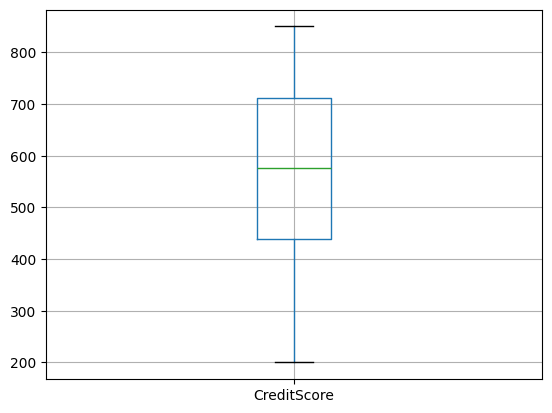

In [12]:
## Detect the outliers using Box plot
df.boxplot(column=['CreditScore'])


In [13]:
## Fix the CreditScore. It can't be more than 850
df.loc[df['CreditScore']>850,'CreditScore']=850


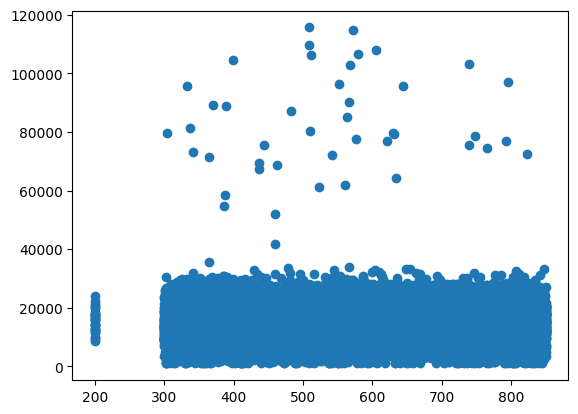

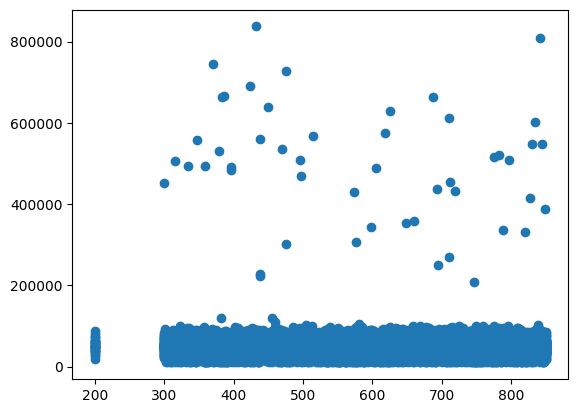

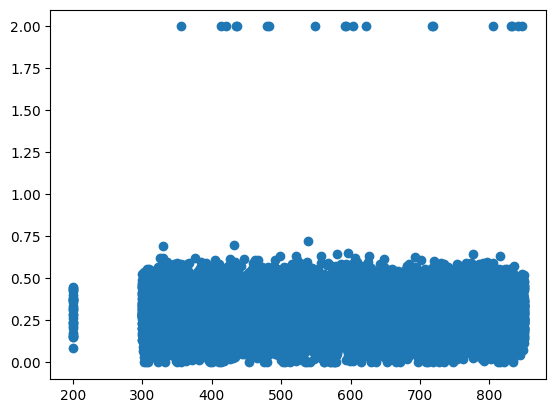

In [14]:
# Plotting scatter plot wrt CreditScore
import matplotlib.pyplot as plt
plt.scatter(df['CreditScore'],df['LoanAmount'])
plt.show()
plt.scatter(df['CreditScore'],df['Income'])
plt.show()
plt.scatter(df['CreditScore'],df['DebtToIncomeRatio'])
plt.show()

#### Detecting Outliers

In [15]:
#Function to detect the outliers
def detect_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR #Wishker left
  upper_bound=Q3+1.5*IQR #Wishker right
  outliers=data[(data[column]<lower_bound) | (data[column]>upper_bound)]
  return outliers

In [16]:
print("Outliers in Income:")
print(detect_outliers(df,'Income'))

print("Outliers in DebtToIncomeRatio:")
print(detect_outliers(df,'DebtToIncomeRatio'))

print("Outliers in LoanAmount:")
print(detect_outliers(df,'LoanAmount'))

Outliers in Income:
      CustomerID         Income    LoanAmount  CreditScore  DebtToIncomeRatio  \
2      CUST00003   10000.000000  14188.791620        561.0           0.162537   
263    CUST00264   10000.000000  19558.135576        750.0           0.292183   
289    CUST00290   90879.406411  24968.025094        427.0           0.442695   
496    CUST00497   10000.000000  21229.340619        553.0           0.316361   
523    CUST00524   92838.493373  13604.328866        429.0           0.530489   
...          ...            ...           ...          ...                ...   
29810  CUST29811  301990.849529  14006.108501        476.0           0.279225   
29893  CUST29894   93616.557870  11953.763347        657.0           0.397271   
29903  CUST29904   10000.000000  17868.632449        609.0           0.489530   
29950  CUST29951   10000.000000  15449.849818        750.0           0.338555   
29998  CUST29999   10000.000000  18861.295690        799.0           0.319657   

       

#### Fixing the Outliers
Cap the outliers with lower and upper bounds.

In [17]:
# Cap the outliers
## Bring the outliers to the wishker
def cap_outliers(data,column):
  Q1=data[column].quantile(0.25)
  Q3=data[column].quantile(0.75)
  IQR=Q3-Q1 #Inter Quantile Range
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  data.loc[(data[column]<lower_bound),column]=lower_bound
  data.loc[(data[column]>upper_bound),column]=upper_bound
  #Alternate
  #data[column].np.where(data[column]<lower_bound,lower_bound,data[column])
  #data[column].np.where(data[column]>upper_bound,upper_bound,data[column])
  return data

In [18]:
cap_outliers(df,'Income')
cap_outliers(df,'DebtToIncomeRatio')
cap_outliers(df,'LoanAmount')

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,Education,LoanApproved
0,CUST00001,47008.957498,11239.783091,548.0,0.405557,Bachelors,No
1,CUST00002,55437.667681,12240.739286,564.0,0.305308,Masters,No
2,CUST00003,10185.810554,14188.791620,561.0,0.162537,Bachelors,No
3,CUST00004,33049.989256,13514.263908,514.0,0.341843,Bachelors,No
4,CUST00005,72337.992374,10156.559065,633.0,0.213681,Other,Yes
...,...,...,...,...,...,...,...
29995,CUST29996,72546.869334,10584.083045,841.0,0.343041,Masters,Yes
29996,CUST29997,71511.007120,10555.298554,484.0,0.251215,Bachelors,No
29997,CUST29998,47140.734719,9744.376936,398.0,0.192594,High School,No
29998,CUST29999,10185.810554,18861.295690,799.0,0.319657,High School,No


<Axes: >

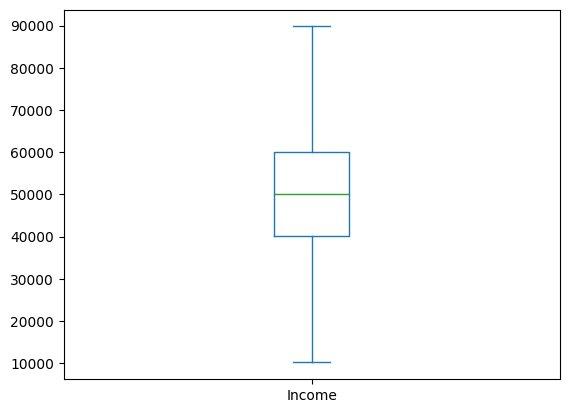

In [19]:
## Now there is no outlier in the plot
df['Income'].plot(kind='box')

<Axes: >

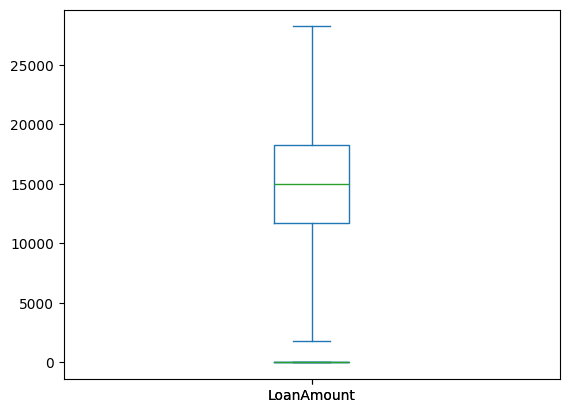

In [20]:
## Now there is no outlier in the plot
df['DebtToIncomeRatio'].plot(kind='box')
## Now there is no outlier in the plot
df['LoanAmount'].plot(kind='box')

In [21]:
print(df.describe())

             Income    LoanAmount   CreditScore  DebtToIncomeRatio
count  30000.000000  30000.000000  30000.000000       30000.000000
mean   49999.779011  15009.622491    575.718400           0.300696
std    14905.030366   4946.145381    158.788227           0.098361
min    10185.810554   1784.634717    200.000000           0.034678
25%    40042.725477  11700.222085    439.000000           0.233936
50%    50011.040976  15016.088764    576.000000           0.300756
75%    59947.335425  18310.613664    712.000000           0.366775
max    89804.250348  28226.201032    850.000000           0.566032


### 1.3. Fixing Missing for Categorical Data
When the data is not numeric. E.g. a category column defining Education (Bachelors, Master, Phd, Other, etc..).
In such columns, we use the mode() to fill the missing values.

In [22]:
# #Reading Dirty Data
# import pandas as pd
# import numpy as np

# #load dataset
# df=pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/loan_eligibility_data_30k.csv')
# df.head()

In [23]:
# find missing data
print(df.isnull().sum())

CustomerID             0
Income                 0
LoanAmount             0
CreditScore            0
DebtToIncomeRatio      0
Education            300
LoanApproved           0
dtype: int64


In [24]:
# Fill the categorical data with mode()
# Fill numerical data with median()
df["Education"].fillna(df["Education"].mode().iloc[0],inplace=True)

print(df.isnull().sum())
df.head()


CustomerID           0
Income               0
LoanAmount           0
CreditScore          0
DebtToIncomeRatio    0
Education            0
LoanApproved         0
dtype: int64


/tmp/ipython-input-24-205796813.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Education"].fillna(df["Education"].mode().iloc[0],inplace=True)


,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,Education,LoanApproved
0,CUST00001,47008.957498,11239.783091,548.0,0.405557,Bachelors,No
1,CUST00002,55437.667681,12240.739286,564.0,0.305308,Masters,No
2,CUST00003,10185.810554,14188.791620,561.0,0.162537,Bachelors,No
3,CUST00004,33049.989256,13514.263908,514.0,0.341843,Bachelors,No
4,CUST00005,72337.992374,10156.559065,633.0,0.213681,Other,Yes


## 2. Normalization / Standarization (for Numerical Data)
**Normalization** and **Standardization** are essential steps in **data pre-processing** that help prepare the data for machine learning models.

### Why They're Important:
- These techniques ensure that features are on the **same scale**, preventing any feature from dominating the model due to its larger range or unit difference.

### 1. **Normalization / Min-Max Scaler Range**: (use, if the data is skewed)
- **Rescales** the data to a fixed range, typically between 0 and 1.
- Used when features have different units or ranges (e.g., height in cm and weight in kg).
  
  **Formula**:  
  $$\text{Normalized Value} = \frac{\text{Value} - \text{Min}}{\text{Max} - \text{Min}} $$

### 2. **Standardization / Z-Score**: (use, if the data is normally distributed)
- **Centers** the data around **0** with a **unit variance** (mean = 0, standard deviation = 1).
- Useful when data follows a Gaussian (normal) distribution or when using algorithms like **SVM**, **Logistic Regression**, or **KNN**.

  **Formula**:  
  $$ \text{Standardized Value or Z-Score} = \frac{\text{Value} - \mu}{\sigma} $$
  where:
  - $ \mu $ is the mean of the feature.
  - $ \sigma $ is the standard deviation of the feature.

## Conclusion:
Both **Normalization** and **Standardization** are key pre-processing techniques that make the data more suitable for modeling by scaling and centering the features properly.

  




In [25]:
#Reading loan Data
import pandas as pd

# Step 0: Sample Data with more rows
# df = pd.DataFrame({
#     'age': [25, 32, 47, 51, 38, 29, 45, 52],
#     'income': [50000, 60000, 80000, 90000, 75000, 55000, 82000, 95000],
#     'gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
#     'education': ['Bachelors', 'Masters', 'PhD', 'Bachelors', 'PhD', 'Masters', 'Bachelors', 'Masters']
# })

# df=pd.read_csv('/content/drive/MyDrive/edurekaai/_data/samples/loan_eligibility_data_30k.csv')
df.head()

,CustomerID,Income,LoanAmount,CreditScore,DebtToIncomeRatio,Education,LoanApproved
0,CUST00001,47008.957498,11239.783091,548.0,0.405557,Bachelors,No
1,CUST00002,55437.667681,12240.739286,564.0,0.305308,Masters,No
2,CUST00003,10185.810554,14188.791620,561.0,0.162537,Bachelors,No
3,CUST00004,33049.989256,13514.263908,514.0,0.341843,Bachelors,No
4,CUST00005,72337.992374,10156.559065,633.0,0.213681,Other,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         30000 non-null  object 
 1   Income             30000 non-null  float64
 2   LoanAmount         30000 non-null  float64
 3   CreditScore        30000 non-null  float64
 4   DebtToIncomeRatio  30000 non-null  float64
 5   Education          30000 non-null  object 
 6   LoanApproved       30000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


In [27]:
#SciKit-learn (sklearn) is popular machine learning library
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [28]:
# Step 0
# Identify the numerical columns
numerical_cols = ['Income', 'LoanAmount', 'CreditScore', 'DebtToIncomeRatio']

# Identify the categorical columns
categorical_cols = ['Education', 'LoanApproved', 'CustomerID']

In [29]:
# Step 1: Z-score normalization on numeric columns
scaler = StandardScaler()
numerical_scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]),
                                columns=numerical_cols,
                                index=df.index)

In [30]:
numerical_scaled_df

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,-0.200662,-0.762190,-0.174565,1.066110
1,0.364842,-0.559816,-0.073800,0.046886
2,-2.671221,-0.165956,-0.092694,-1.404640
3,-1.137205,-0.302333,-0.388690,0.418333
4,1.498728,-0.981197,0.360748,-0.884670
...,...,...,...,...
29995,1.512742,-0.894760,1.670691,0.430518
29996,1.443243,-0.900580,-0.577624,-0.503064
29997,-0.191821,-1.064533,-1.119235,-1.099057
29998,-2.671221,0.778735,1.406183,0.192776


In [31]:
# Step 1: Min-Max Scaling on numeric columns (it is preferred on unstructured data)
scaler = MinMaxScaler(feature_range=(0, 1))
numerical_scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]),
                                columns=numerical_cols,
                                index=df.index)
numerical_scaled_df.head()

,Income,LoanAmount,CreditScore,DebtToIncomeRatio
0,0.462495,0.357587,0.535385,0.697989
1,0.568359,0.395442,0.560000,0.509320
2,0.000000,0.469116,0.555385,0.240628
3,0.287172,0.443606,0.483077,0.578079
4,0.780625,0.316620,0.666154,0.336880


## 3. Encoding (for Categorical Data)
**Encoding** in data science refers to the process of converting **categorical data** (data that represents categories, like names or labels) into a **numerical format** that machine learning models can understand. Most machine learning algorithms work with numerical data, so encoding helps to transform categorical features into numerical representations.

### Why Do You Need Encoding?

1. **Machine Learning Algorithms Require Numbers**:  
   Algorithms like **Linear Regression**, **SVM**, and **K-Nearest Neighbors (KNN)** expect numerical input. Categorical variables (like `color`, `city`, `product_type`) need to be converted into numbers to be used in the model.

2. **Improves Model Performance**:  
   Properly encoded categorical features can help the model recognize patterns more effectively and make better predictions.

3. **Helps with Feature Interaction**:  
   Encoding can reveal hidden relationships between categorical variables and the target variable, which can improve the model's predictive accuracy.


### Types of Encoding Techniques:

#### 1. **Label Encoding**
- **What it is**: Converts each category into a unique integer.
- **When to use**: Suitable for **ordinal data** (data with a natural order, like `low`, `medium`, `high`).
- **Example**:
  - Categories: `['red', 'green', 'blue']`
  - Encoded values: `[0, 1, 2]`

**<font color='red'>When not to use label encoding</font>**

Don't use it for nominal (unordered) categories with linear models (like linear regression, logistic regression), because:

The model may interpret the numerical order as meaningful, leading to incorrect inferences.

For instance, Red = 0, Green = 1, Blue = 2 implies Blue > Green > Red, which is not true.

#### 2. **One-Hot Encoding**
- **What it is**: Converts each category into a binary (0 or 1) vector, with each category represented by a separate binary feature.
- **When to use**: Suitable for **nominal data** (data with no inherent order, like `city` names).
- **Example1**:
  - Categories: `['red', 'green', 'blue']`
  - One-Hot encoded values:
    - `red` → `[1, 0, 0]`
    - `green` → `[0, 1, 0]`
    - `blue` → `[0, 0, 1]`

- **Example2**:

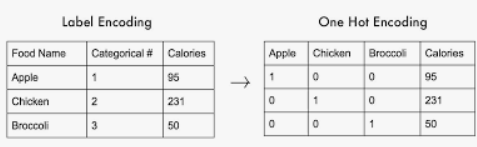

#### 2.2.1 One-Hot Encoding

One-hot encoding is a method used in machine learning and data preprocessing to convert categorical variables into a numerical format that can be provided to algorithms. It works by representing each category as a binary vector, where:

Only one bit is "hot" (i.e., set to 1) to indicate the presence of a particular category.

All other bits are set to 0.

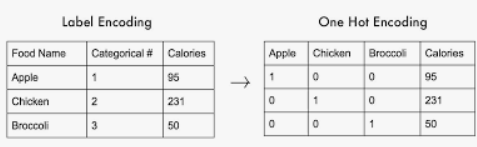

In [32]:
# One-hot encoding on categorical columns - using pandas
categorical_encoded = pd.get_dummies(df[categorical_cols],
                                     columns=categorical_cols,
                                     drop_first=False)

categorical_encoded

,Education_Bachelors,Education_High School,Education_Masters,Education_Other,Education_PhD,LoanApproved_No,LoanApproved_Yes,CustomerID_CUST00001,CustomerID_CUST00002,CustomerID_CUST00003,...,CustomerID_CUST29991,CustomerID_CUST29992,CustomerID_CUST29993,CustomerID_CUST29994,CustomerID_CUST29995,CustomerID_CUST29996,CustomerID_CUST29997,CustomerID_CUST29998,CustomerID_CUST29999,CustomerID_CUST30000
0,True,False,False,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
29996,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
29997,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29998,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [33]:
# # Step 2: One-hot encoding on categorical columns - using sklearn

# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Your categorical columns
# categorical_cols = ['Education', 'LoanApproved', 'CustomerID'] # Example

# # Initialize encoder (for sklearn >= 1.2)
# encoder = OneHotEncoder(sparse_output=False, drop=None)

# # Fit and transform
# categorical_encoded_array = encoder.fit_transform(df[categorical_cols])

# # Get column names
# encoded_col_names = encoder.get_feature_names_out(categorical_cols)

# # Create DataFrame
# categorical_encoded = pd.DataFrame(categorical_encoded_array, columns=encoded_col_names, index=df.index)

# categorical_encoded.head()


In [34]:
# Step 4: Concatenate final DataFrame
final_df = pd.concat([numerical_scaled_df, categorical_encoded], axis=1)

In [35]:
print(final_df)

         Income  LoanAmount  CreditScore  DebtToIncomeRatio  \
0      0.462495    0.357587     0.535385           0.697989   
1      0.568359    0.395442     0.560000           0.509320   
2      0.000000    0.469116     0.555385           0.240628   
3      0.287172    0.443606     0.483077           0.578079   
4      0.780625    0.316620     0.666154           0.336880   
...         ...         ...          ...                ...   
29995  0.783249    0.332788     0.986154           0.580334   
29996  0.770239    0.331700     0.436923           0.407519   
29997  0.464150    0.301031     0.304615           0.297195   
29998  0.000000    0.645826     0.921538           0.536326   
29999  0.785747    0.844864     0.406154           0.300962   

       Education_Bachelors  Education_High School  Education_Masters  \
0                     True                  False              False   
1                    False                  False               True   
2                     True 

In [36]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

# Example: encoding the 'Education' column
label_encoder = LabelEncoder()

df['Education_LabelEncoded'] = label_encoder.fit_transform(df['Education'])

# Check result
df[['Education', 'Education_LabelEncoded']].head()


,Education,Education_LabelEncoded
0,Bachelors,0
1,Masters,2
2,Bachelors,0
3,Bachelors,0
4,Other,3
